63/63 [==============================] - 0s 2ms/step
[[ 128    0]
 [   0 1872]]
63/63 [==============================] - 0s 5ms/step - loss: 0.0023 - accuracy: 1.0000
Best Validation Loss: 0.001254234230145812
Best Validation Accuracy: 1.0
1 0.002281511202454567 1.0
63/63 [==============================] - 0s 2ms/step
[[ 128    0]
 [   0 1872]]
63/63 [==============================] - 0s 5ms/step - loss: 0.0024 - accuracy: 1.0000
Best Validation Loss: 0.004863477777689695
Best Validation Accuracy: 0.9987499713897705
2 0.0023998518008738756 1.0
63/63 [==============================] - 0s 2ms/step
[[ 128    0]
 [   0 1872]]
63/63 [==============================] - 0s 5ms/step - loss: 0.0023 - accuracy: 1.0000
Best Validation Loss: 0.0009193948935717344
Best Validation Accuracy: 1.0
3 0.002257381333038211 1.0
63/63 [==============================] - 0s 2ms/step
[[ 128    0]
 [   0 1872]]
63/63 [==============================] - 0s 6ms/step - loss: 0.0023 - accuracy: 1.0000
Best Validation

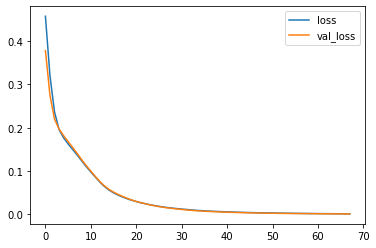

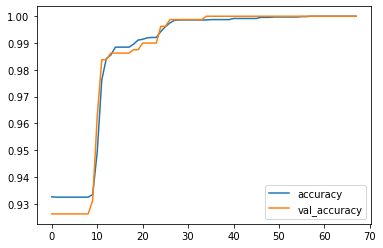

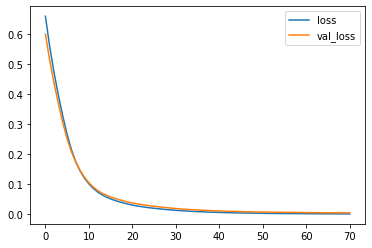

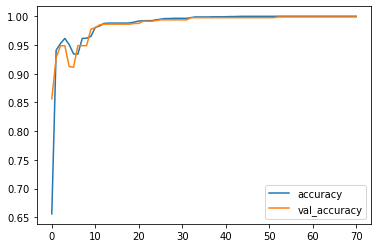

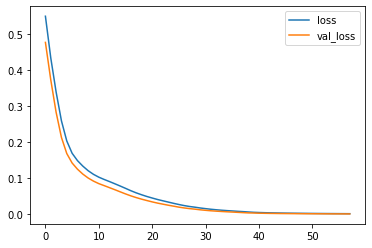

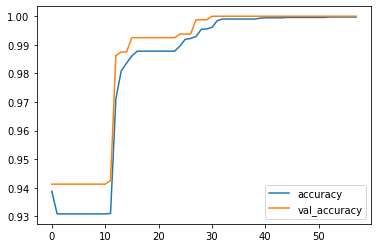

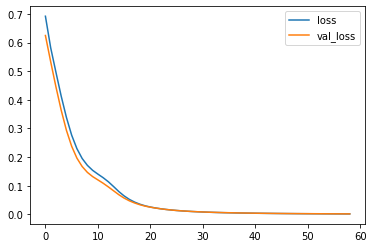

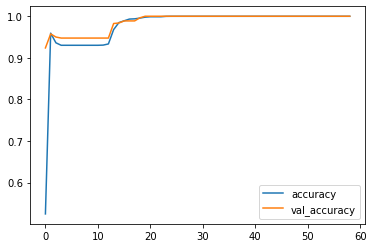

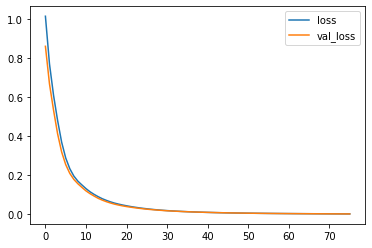

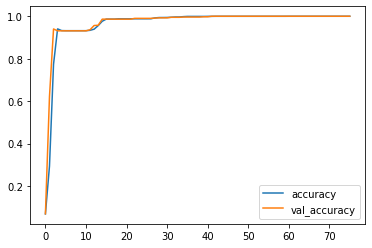

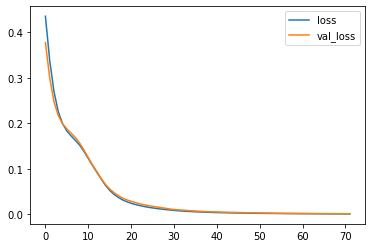

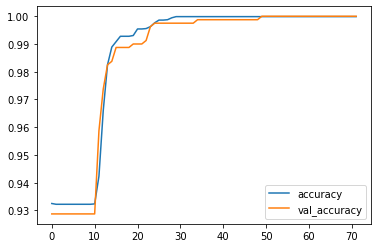

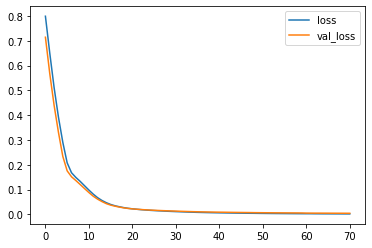

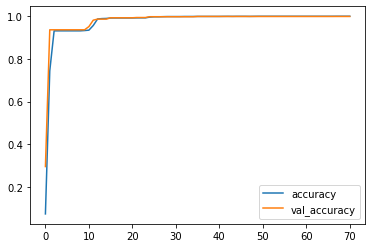

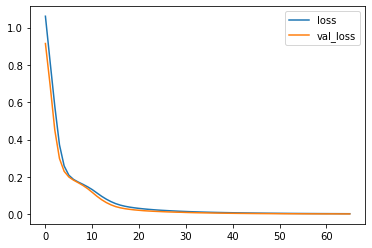

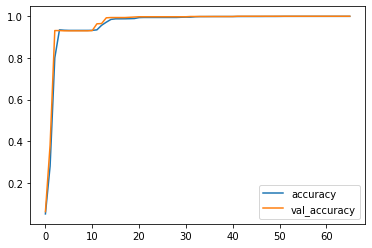

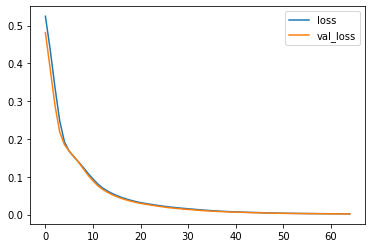

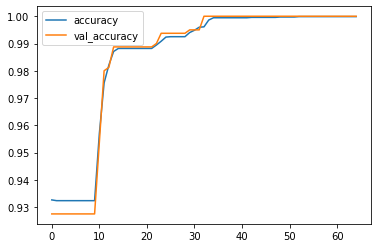

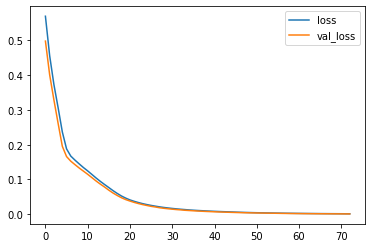

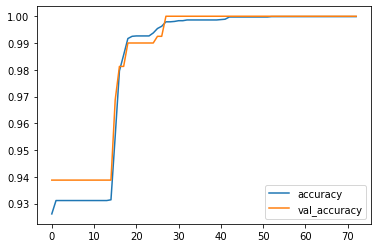

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import random 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import confusion_matrix
from keras.layers import Dense, Input, Dropout
from tensorflow.keras.layers import BatchNormalization
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

plt.rcParams["figure.figsize"] = [16,10]

seed_ = 23
tf.random.set_seed(seed_)
tf.keras.utils.set_random_seed(seed_)
tf.config.experimental.enable_op_determinism()

def load_data():
    # Target "E", "CATECHOL"
    df = pd.read_csv('ALARM.csv')
    df['CATECHOL'] = df['CATECHOL'].map({'HIGH':0,'NORMAL':1})
    y = df['CATECHOL']
    X = df.drop(['CATECHOL'], axis = 1)
    X = pd.get_dummies(X)
    
#     df['E'] = df['E'].map({'no': 0, 'yes': 1})
#     y = df['E']
#     print(y.value_counts())
#     X = df.drop(['E'], axis = 1)
#     X = pd.get_dummies(X)
  
    y = y.values
    X = X.values
    return X,y

def build_model():
    model = tf.keras.Sequential([
      tf.keras.layers.Dense(units, activation="relu", input_shape=[7]),
      tf.keras.layers.Dense(units, activation="relu"),
      tf.keras.layers.Dense(1, activation="sigmoid")
    ])
    model.compile(loss="binary_crossentropy", #tf.keras.losses.SparseCategoricalCrossentropy()
                optimizer=tf.keras.optimizers.Adam(), 
                metrics=["accuracy"])
    return model

def train_and_evaluate(model, X_train, y_train, X_val, y_val, X_test, y_test):
    early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True)
    
    #lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
    
    history = model.fit(X_train, y_train,
    validation_data=(X_val, y_val),
    epochs= 100,
    batch_size=512,                 
    callbacks=[early_stopping],
    verbose=0)
    
    y_preds = model.predict(X_test)
    cfmx = confusion_matrix(y_test, tf.round(y_preds))
    #print(classification_report(y_test, tf.round(y_preds)))
    print(cfmx)
    
    history_df = pd.DataFrame(history.history)
    
    history_df.loc[:, ['loss', 'val_loss']].plot()
    history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
    
    loss, accuracy = model.evaluate(X_test, y_test)
    
    print( f"Best Validation Loss: { history_df['val_loss'].min() }" )
    print( f"Best Validation Accuracy: { history_df['val_accuracy'].max() }" )
    
    return loss, accuracy

if __name__ == "__main__":    
    seed = 12
    units = 16
    
    res = []
    #random.randint(0, 100)
    kf = KFold(n_splits = 10, random_state = seed, shuffle= True)
    X,y = load_data()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= seed)

    for i, (train_index, val_index) in enumerate( kf.split(X_train, y_train) ):
        model = None 
        model = build_model()
        loss, accuracy = train_and_evaluate(model, X_train[train_index], y_train[train_index], 
                                            X_train[val_index], y_train[val_index], X_test, y_test)
        res.append([i+1, loss, accuracy])
        print(i+1, loss, accuracy)
            
    df_res = pd.DataFrame(res, columns = ['Run', 'Loss', 'Accuracy' ])
    #df_res.to_csv('res.csv', index = False)
    print( f"The average mean of loss is {df_res['Loss'].mean()}")
    print( f"The average accuracy is {df_res['Accuracy'].mean()}")

In [5]:
def load_data():
    # Target "E", "CATECHOL"
    df = pd.read_csv('ALARM.csv')
    df['CATECHOL'] = df['CATECHOL'].map({'HIGH':0,'NORMAL':1})
    y = df['CATECHOL']
    X = df.drop(['CATECHOL'], axis = 1)
    X = pd.get_dummies(X)
    
#     df['E'] = df['E'].map({'no': 0, 'yes': 1})
#     y = df['E']
#     print(y.value_counts())
#     X = df.drop(['E'], axis = 1)
#     X = pd.get_dummies(X)
  
    y = y.values
    X = X.values
    return X,y
X, y = load_data()
print(X.)

(10000, 93)


In [ ]:

# temp = {'temperature' :['very cold', 'cold', 'warm', 'hot', 'very hot']}
# df=pd.DataFrame(temp,columns=["temperature"])
# temp_dict = {'very cold': 1,'cold': 2,'warm': 3,'hot': 4,"very hot":5}
# df["temp_ordinal"] = df.temperature.map(temp_dict)

In [ ]:
import numpy as np
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [18]:
# pathfinder', 'asia', 'alarm', 'insurance'
# df = bn.import_example(data='asia')
# df.to_csv('ASIA.csv', index = None)

import bnlearn as bn
# Load DAG
df = bn.import_example(data='insurance')


[bnlearn] >Downloading example [insurance] dataset..


HTTPError: HTTP Error 404: Not Found